In [1]:
import os
import sys
import warnings

import pdb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

from utils import MySet

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise_update.pkl')

In [3]:
df.columns

Index(['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
       'gvtec2_dt', 'state_night', 'state_dawn', 'vm1', 'vd1', 'vm2', 'vd2',
       'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4'],
      dtype='object')

In [4]:
original = MySet('original', ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'])
tempo  = MySet('tempo', ['state_night', 'state_dawn'])
mdv1 = MySet('mdv1', ['vm1', 'vd1'])
mdv2 = MySet('mdv2', ['vm2', 'vd2'])
lag = MySet('lag', ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20'])

vtec = MySet('vtec', ['vtec'])
vtec_dt = MySet('vtec_dt', ['vtec_dt'])
vtec_dt2 = MySet('vtec_dt2', ['vtec_dt2'])
gvtec1 = MySet('gvtec1', ['gvtec1'])
gvtec1_dt = MySet('gvtec1_dt', ['gvtec1_dt'])
gvtec2 = MySet('gvtec2', ['gvtec2'])
gvtec2_dt = MySet('gvtec2_dt', ['gvtec2_dt'])
state_night = MySet('state_night', ['state_night'])
state_dawn = MySet('state_dawn', ['state_dawn'])
vm1 = MySet('vm1', ['vm1'])
vd1 = MySet('vd1', ['vd1'])
vm2 = MySet('vm2', ['vm2'])
vd2 = MySet('vd2', ['vd2'])
gvtec1_dt_lag_9 = MySet('gvtec1_dt_lag_9', ['gvtec1_dt_lag_9'])
gvtec2_dt_lag_20 = MySet('gvtec2_dt_lag_20', ['gvtec2_dt_lag_20'])

In [5]:
set_tests = [original,
             original-vtec,
             original-vtec_dt,
             original-gvtec1,
             original-gvtec1_dt,
             original-gvtec2,
             original-gvtec2_dt,
             original+tempo,
             original+gvtec1_dt_lag_9,
             original+gvtec2_dt_lag_20,
             original+lag,
             original+mdv1,
             original+mdv2,
             original+tempo+lag,
             original+tempo+mdv2,
             original+tempo+mdv2+lag,
             original+tempo+lag+mdv1+mdv2,
             vtec,
             vtec+gvtec1_dt_lag_9,
             vtec+gvtec2_dt_lag_20,
             vtec+vtec_dt+vtec_dt2,
             vtec+gvtec1+gvtec2,
             vtec+tempo,
             vtec+tempo+mdv1,
             vtec+tempo+lag,
             vtec+tempo+lag+mdv1,
             vtec+tempo+lag+mdv2,
             vtec+tempo+lag+mdv1+mdv2]

original
Error for the time series sample:
acc             0.859503
f1              0.509058
far             0.428151
fn             47.900000
fp             31.200000
kappa           0.071028
me              0.349076
mse             0.004348
pod             0.461798
precission      0.571849
re             24.025823
recall          0.461798
tn            442.800000
tp             41.100000
tse             1.564045
dtype: float64


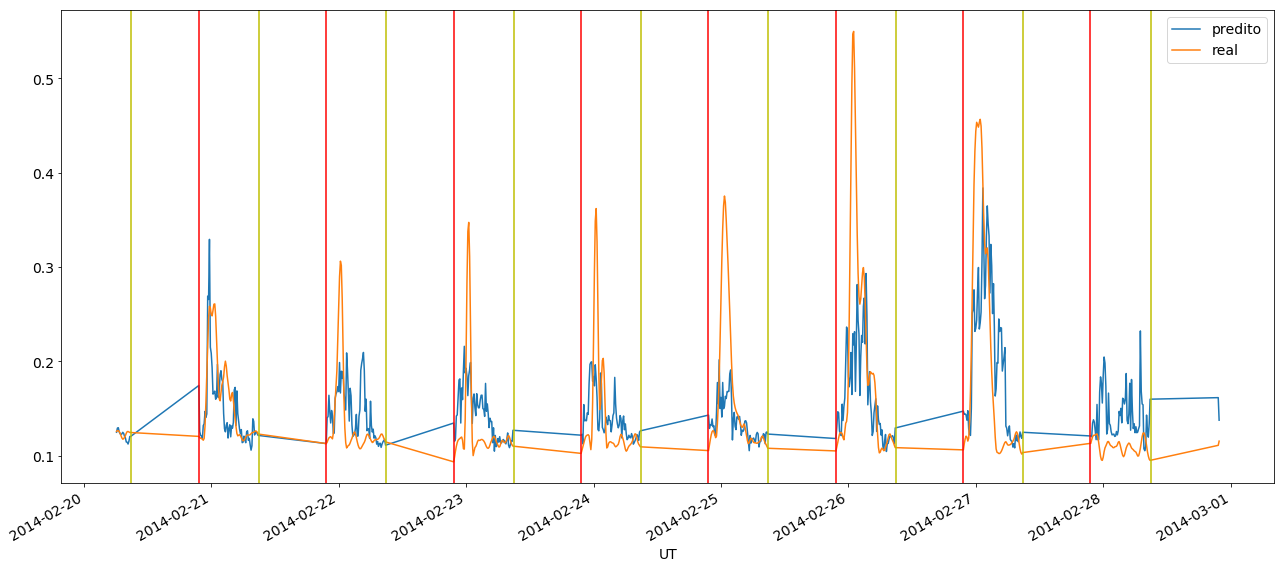


original - vtec
Error for the time series sample:
acc             0.834813
f1              0.537403
far             0.517925
fn             34.900000
fp             58.100000
kappa           0.055649
me              0.338262
mse             0.004920
pod             0.607865
precission      0.482075
re             30.836968
recall          0.607865
tn            415.900000
tp             54.100000
tse             1.663572
dtype: float64


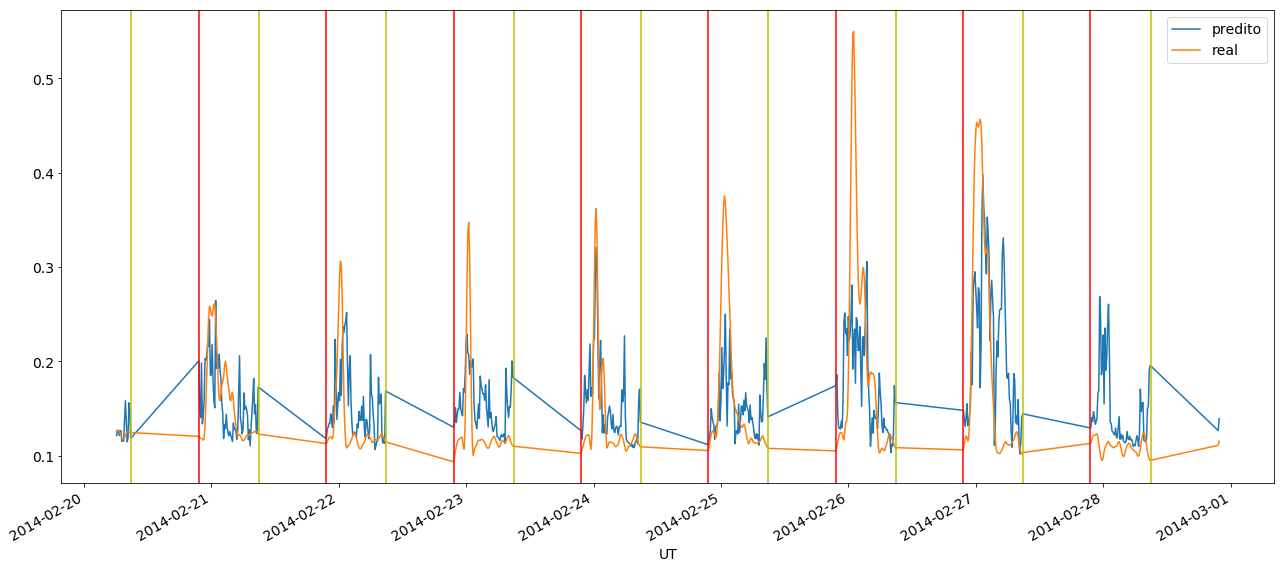


original - vtec_dt
Error for the time series sample:
acc             0.866252
f1              0.537391
far             0.406575
fn             45.100000
fp             30.200000
kappa           0.067341
me              0.347827
mse             0.004291
pod             0.493258
precission      0.593425
re             23.203674
recall          0.493258
tn            443.800000
tp             43.900000
tse             1.553634
dtype: float64


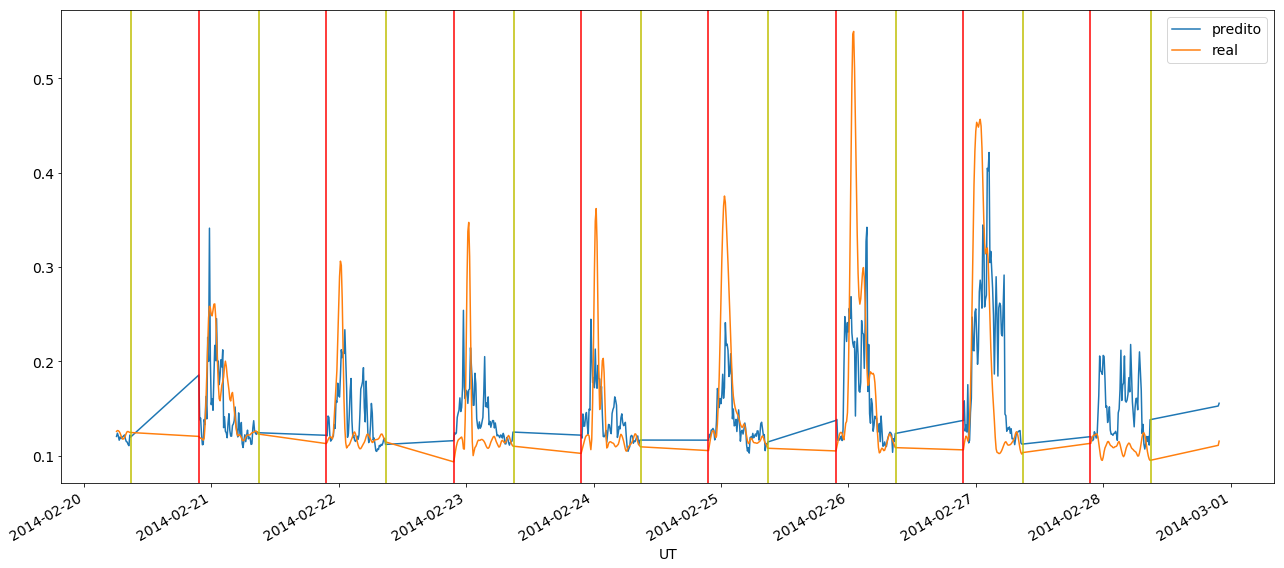


original - gvtec1
Error for the time series sample:
acc             0.863943
f1              0.521623
far             0.411783
fn             47.200000
fp             29.400000
kappa           0.070105
me              0.343519
mse             0.004512
pod             0.469663
precission      0.588217
re             25.023724
recall          0.469663
tn            444.600000
tp             41.800000
tse             1.593345
dtype: float64


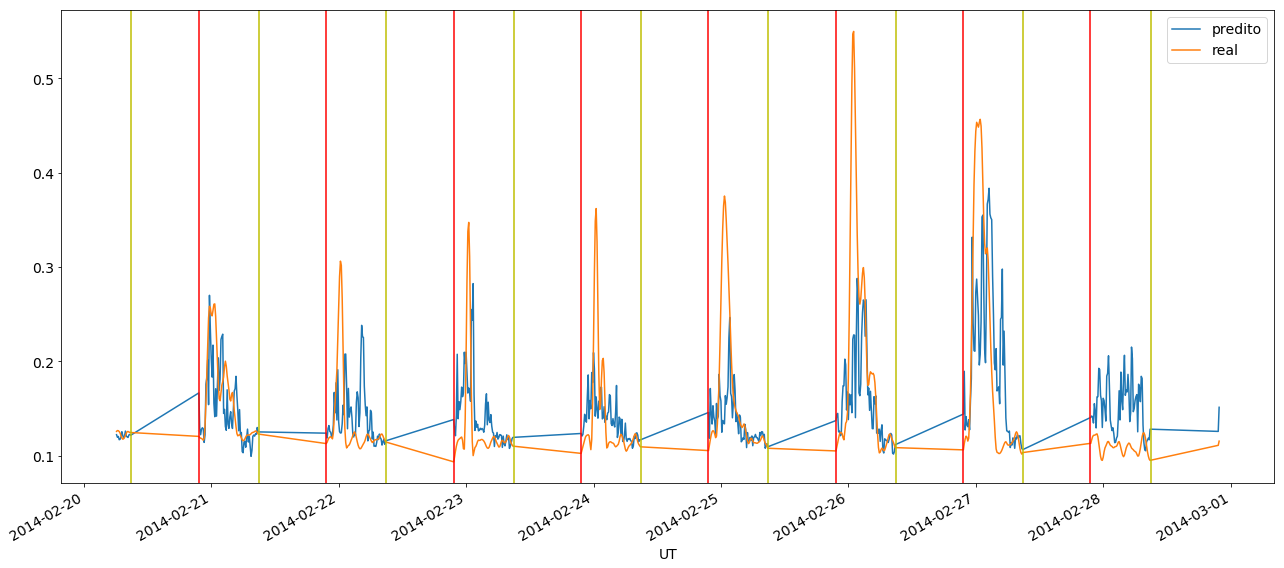


original - gvtec1_dt
Error for the time series sample:
acc             0.869272
f1              0.520411
far             0.381948
fn             48.800000
fp             24.800000
kappa           0.072316
me              0.365444
mse             0.004363
pod             0.451685
precission      0.618052
re             22.569799
recall          0.451685
tn            449.200000
tp             40.200000
tse             1.566807
dtype: float64


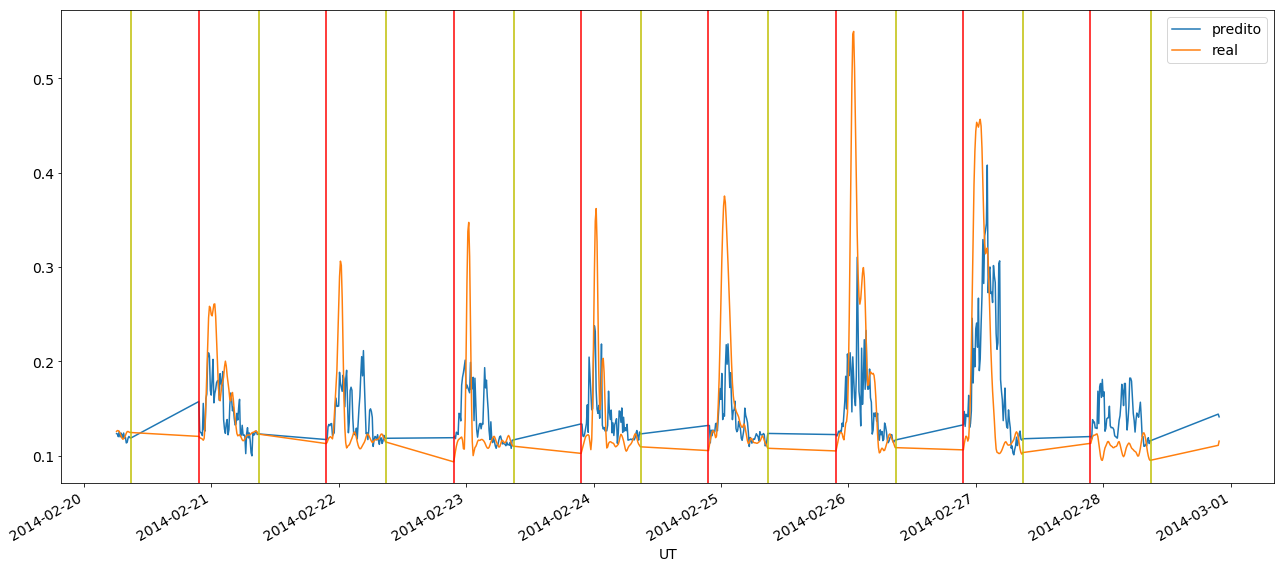


original - gvtec2
Error for the time series sample:
acc             0.814565
f1              0.492282
far             0.563650
fn             38.400000
fp             66.000000
kappa           0.060140
me              0.328757
mse             0.005249
pod             0.568539
precission      0.436350
re             31.277575
recall          0.568539
tn            408.000000
tp             50.600000
tse             1.718746
dtype: float64


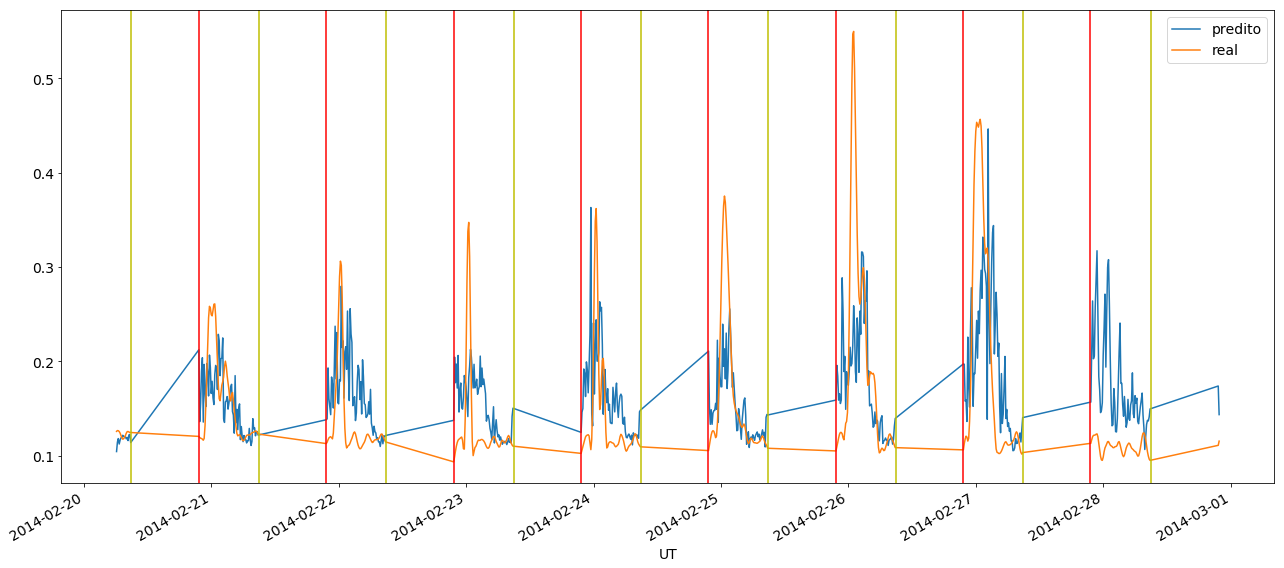


original - gvtec2_dt
Error for the time series sample:
acc             0.856661
f1              0.516984
far             0.443850
fn             45.700000
fp             35.000000
kappa           0.068181
me              0.357774
mse             0.004541
pod             0.486517
precission      0.556150
re             24.591274
recall          0.486517
tn            439.000000
tp             43.300000
tse             1.598739
dtype: float64


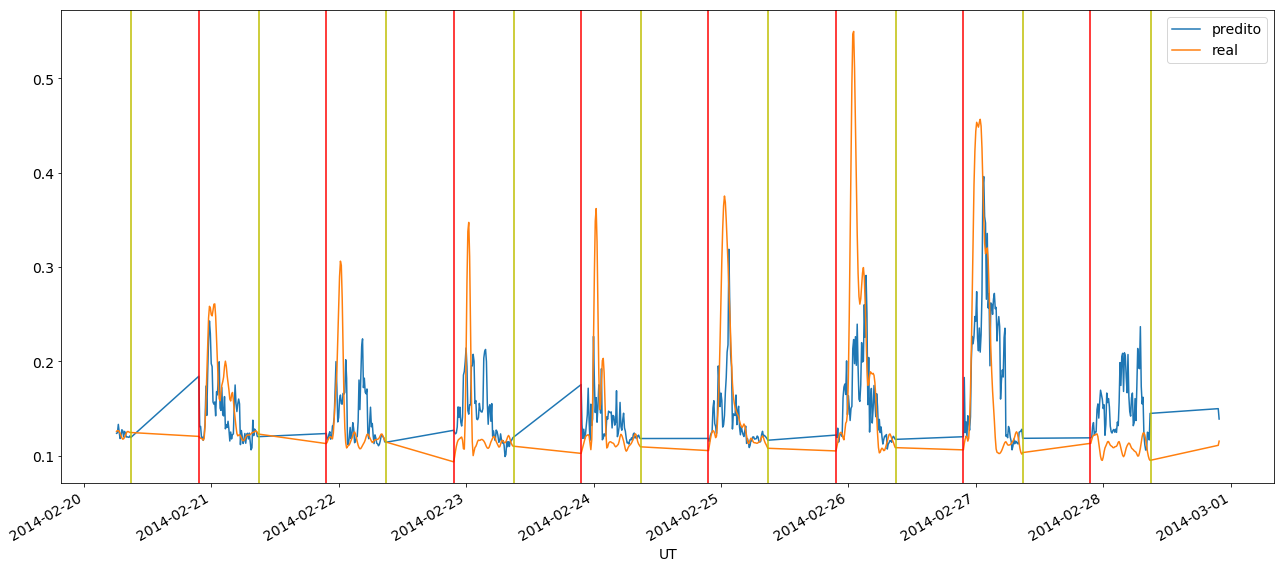


original + tempo
Error for the time series sample:
acc             0.869982
f1              0.574513
far             0.404460
fn             39.400000
fp             33.800000
kappa           0.060039
me              0.356001
mse             0.004162
pod             0.557303
precission      0.595540
re             24.165649
recall          0.557303
tn            440.200000
tp             49.600000
tse             1.530317
dtype: float64


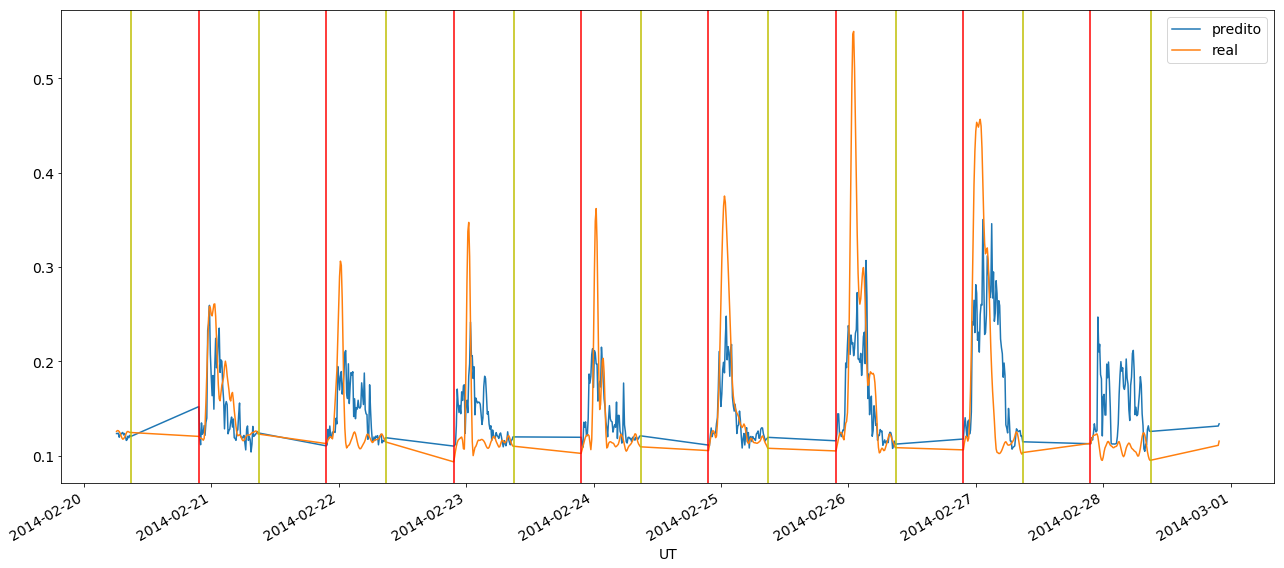


original + gvtec1_dt_lag_9
Error for the time series sample:
acc             0.866963
f1              0.582123
far             0.419151
fn             36.800000
fp             38.100000
kappa           0.056940
me              0.355033
mse             0.004137
pod             0.586517
precission      0.580849
re             24.093704
recall          0.586517
tn            435.900000
tp             52.200000
tse             1.525402
dtype: float64


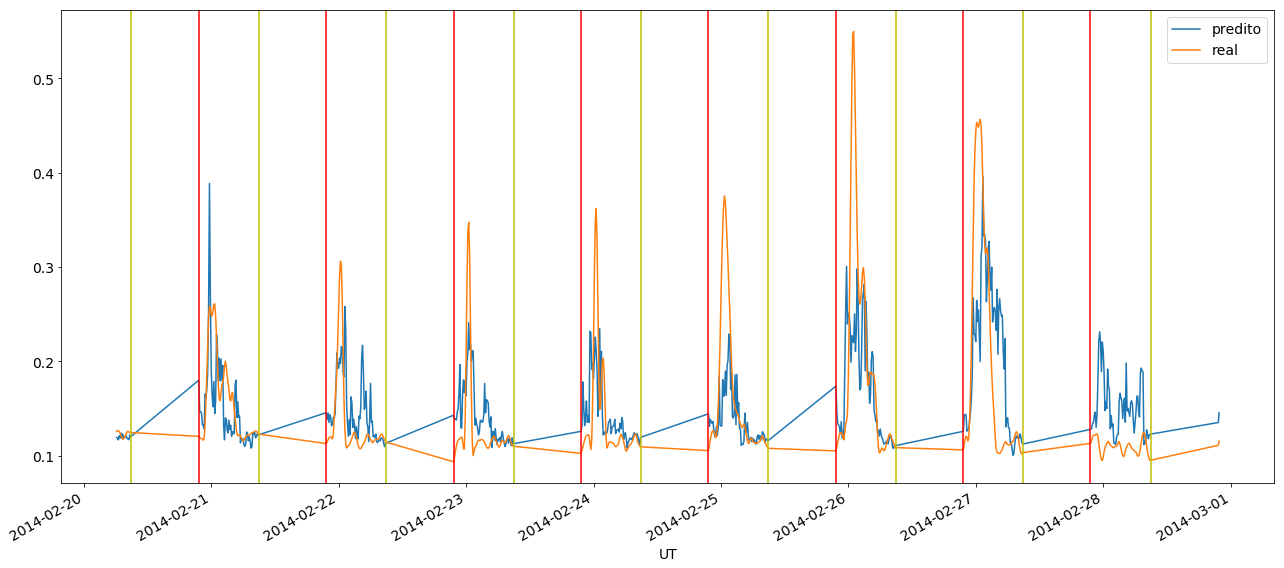


original + gvtec2_dt_lag_20
Error for the time series sample:
acc             0.860391
f1              0.538951
far             0.430161
fn             43.100000
fp             35.500000
kappa           0.064870
me              0.362108
mse             0.004289
pod             0.515730
precission      0.569839
re             24.096577
recall          0.515730
tn            438.500000
tp             45.900000
tse             1.553385
dtype: float64


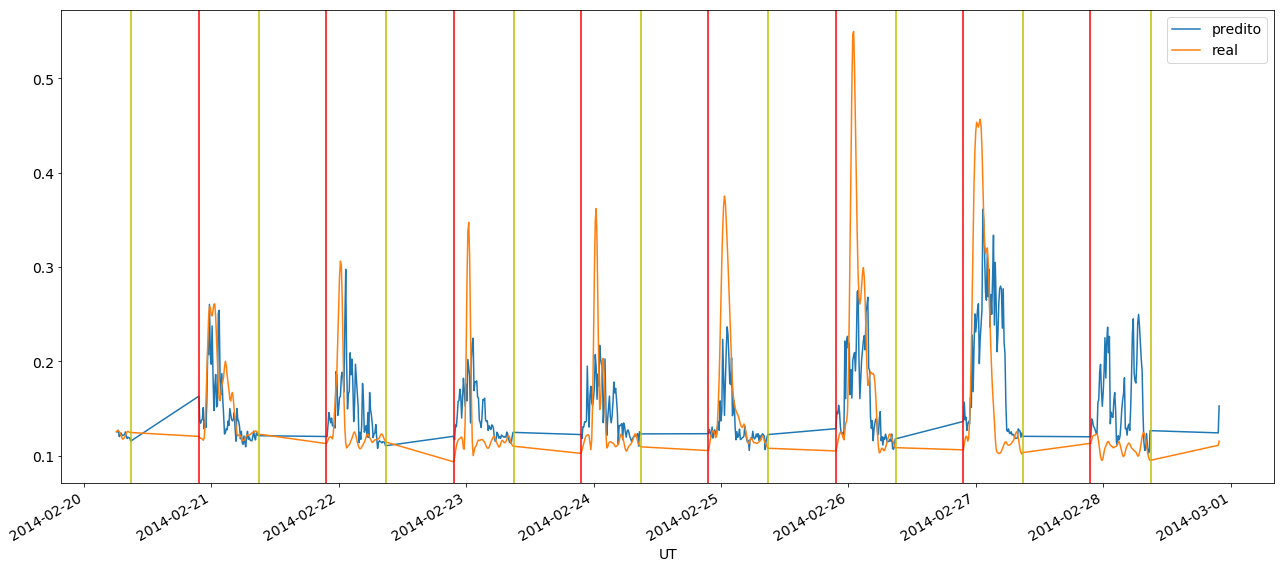


original + lag
Error for the time series sample:
acc             0.870337
f1              0.589745
far             0.409638
fn             36.400000
fp             36.600000
kappa           0.056365
me              0.355693
mse             0.004102
pod             0.591011
precission      0.590362
re             24.137137
recall          0.591011
tn            437.400000
tp             52.600000
tse             1.519037
dtype: float64


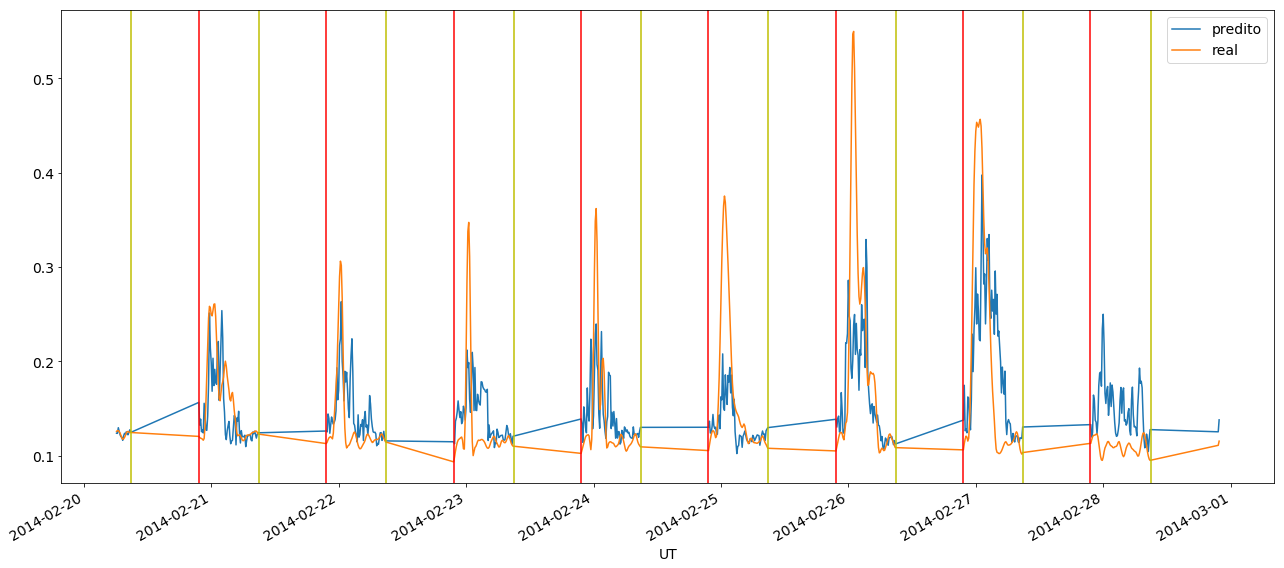


original + mdv1
Error for the time series sample:
acc             0.838721
f1              0.579831
far             0.503993
fn             26.500000
fp             64.300000
kappa           0.047032
me              0.347447
mse             0.004512
pod             0.702247
precission      0.496007
re             28.230164
recall          0.702247
tn            409.700000
tp             62.500000
tse             1.593135
dtype: float64


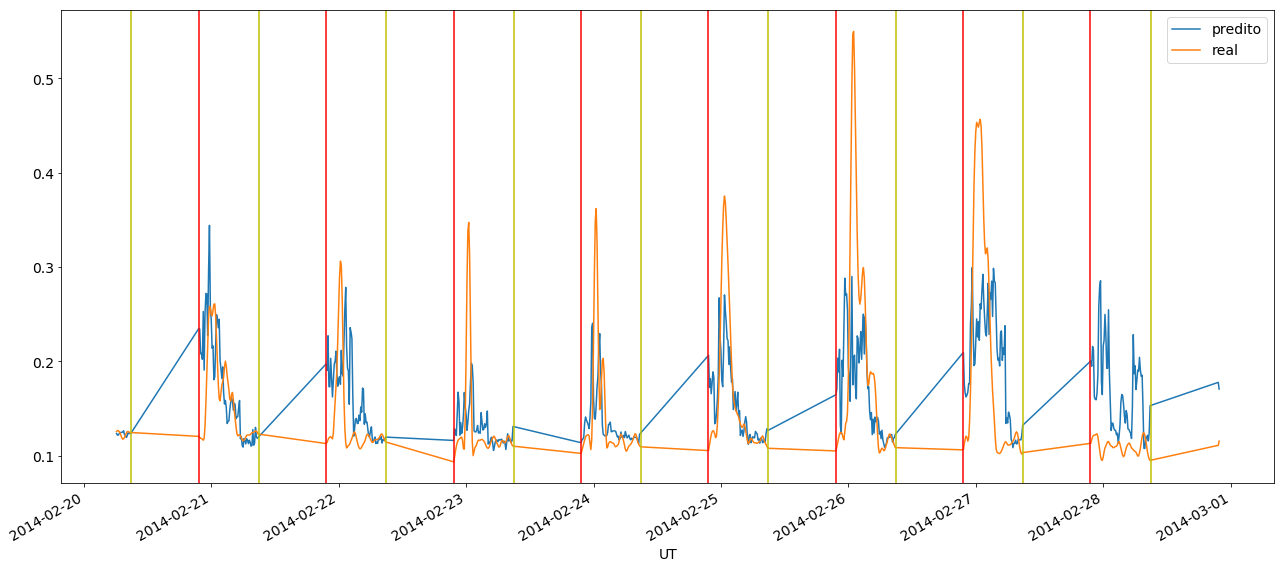


original + mdv2
Error for the time series sample:
acc             0.855062
f1              0.515316
far             0.446240
fn             45.500000
fp             36.100000
kappa           0.068035
me              0.361022
mse             0.004518
pod             0.488764
precission      0.553760
re             26.206786
recall          0.488764
tn            437.900000
tp             43.500000
tse             1.594352
dtype: float64


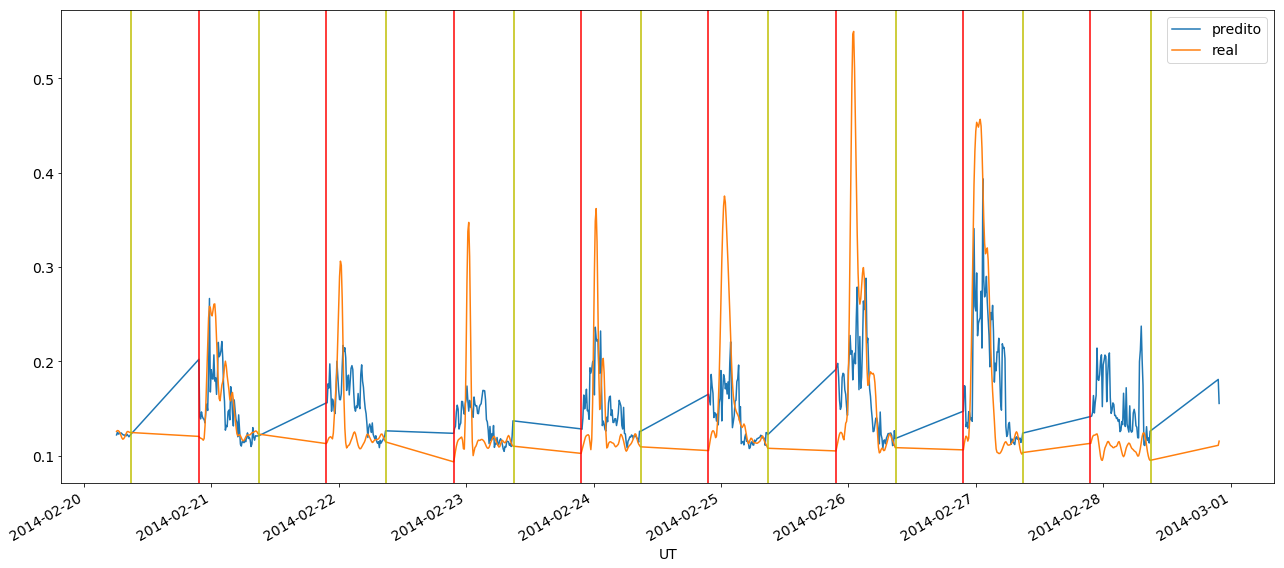


original + tempo + lag
Error for the time series sample:
acc             0.878863
f1              0.607372
far             0.377673
fn             35.800000
fp             32.400000
kappa           0.055383
me              0.368315
mse             0.004012
pod             0.597753
precission      0.622327
re             22.968877
recall          0.597753
tn            441.600000
tp             53.200000
tse             1.502542
dtype: float64


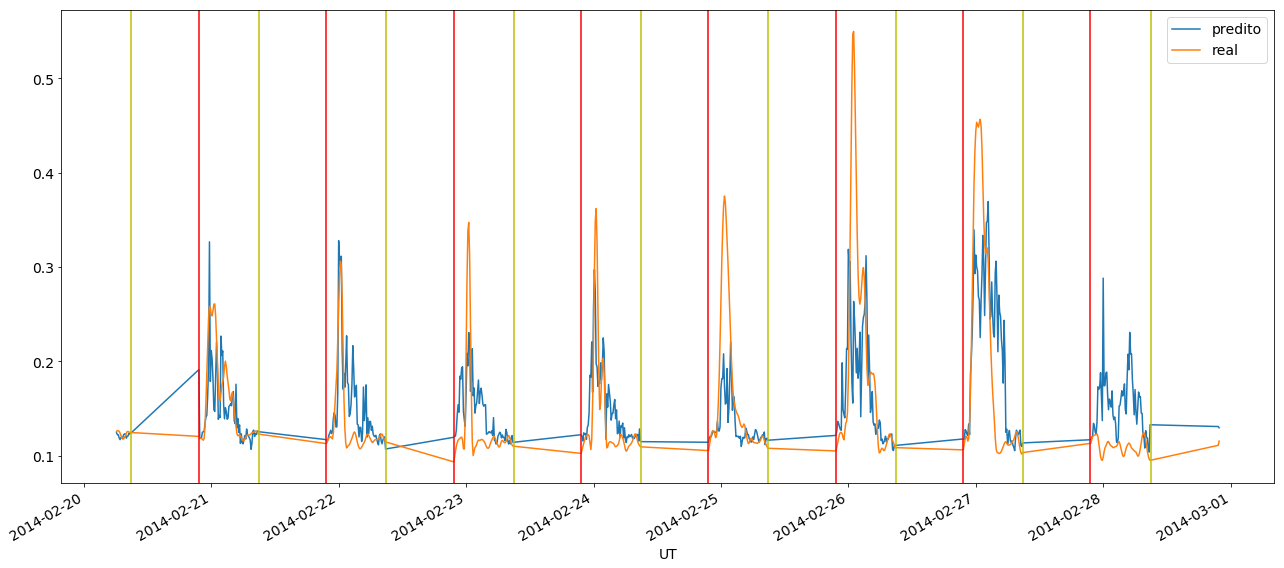


original + tempo + mdv2
Error for the time series sample:
acc             0.866963
f1              0.571203
far             0.411602
fn             38.700000
fp             36.200000
kappa           0.059540
me              0.346626
mse             0.004393
pod             0.565169
precission      0.588398
re             25.962260
recall          0.565169
tn            437.800000
tp             50.300000
tse             1.571491
dtype: float64


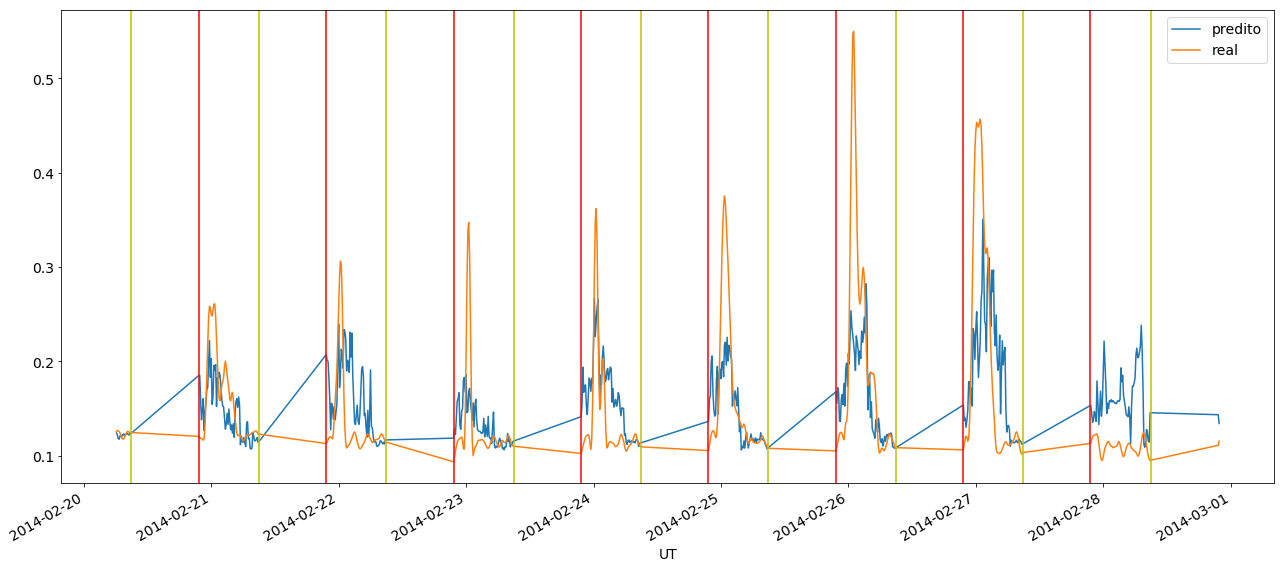


original + tempo + mdv2 + lag
Error for the time series sample:
acc             0.863233
f1              0.598490
far             0.440672
fn             31.400000
fp             45.600000
kappa           0.050778
me              0.339144
mse             0.004065
pod             0.647191
precission      0.559328
re             24.973083
recall          0.647191
tn            428.400000
tp             57.600000
tse             1.512380
dtype: float64


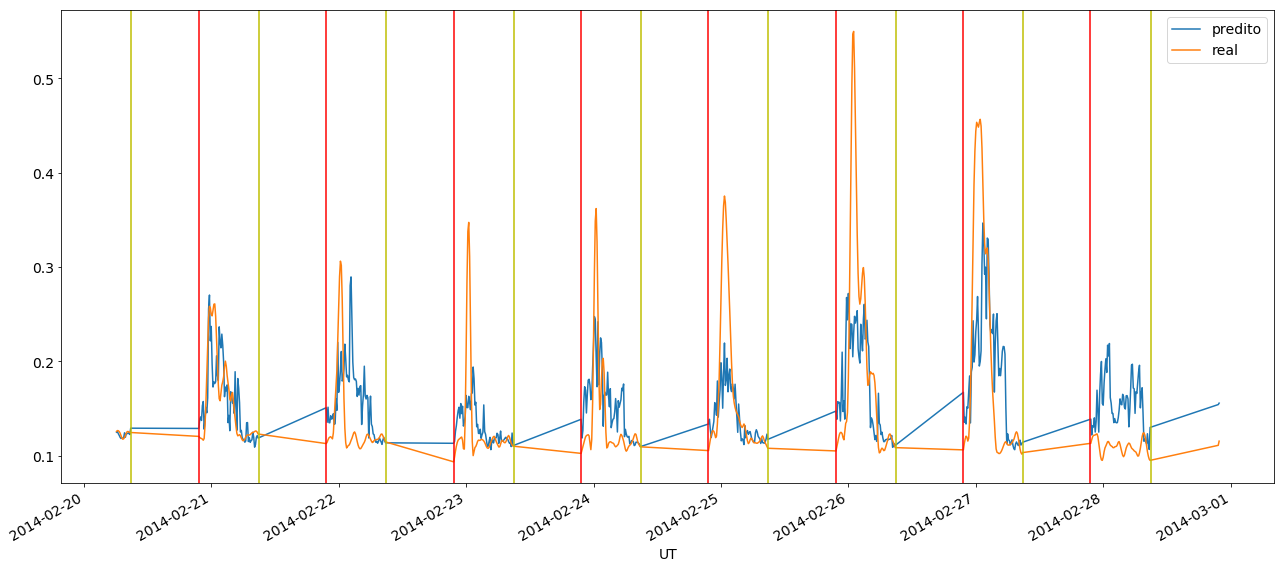


original + tempo + lag + mdv1 + mdv2
Error for the time series sample:
acc             0.861279
f1              0.627258
far             0.450319
fn             23.600000
fp             54.500000
kappa           0.042500
me              0.332725
mse             0.004151
pod             0.734831
precission      0.549681
re             27.253510
recall          0.734831
tn            419.500000
tp             65.400000
tse             1.527626
dtype: float64


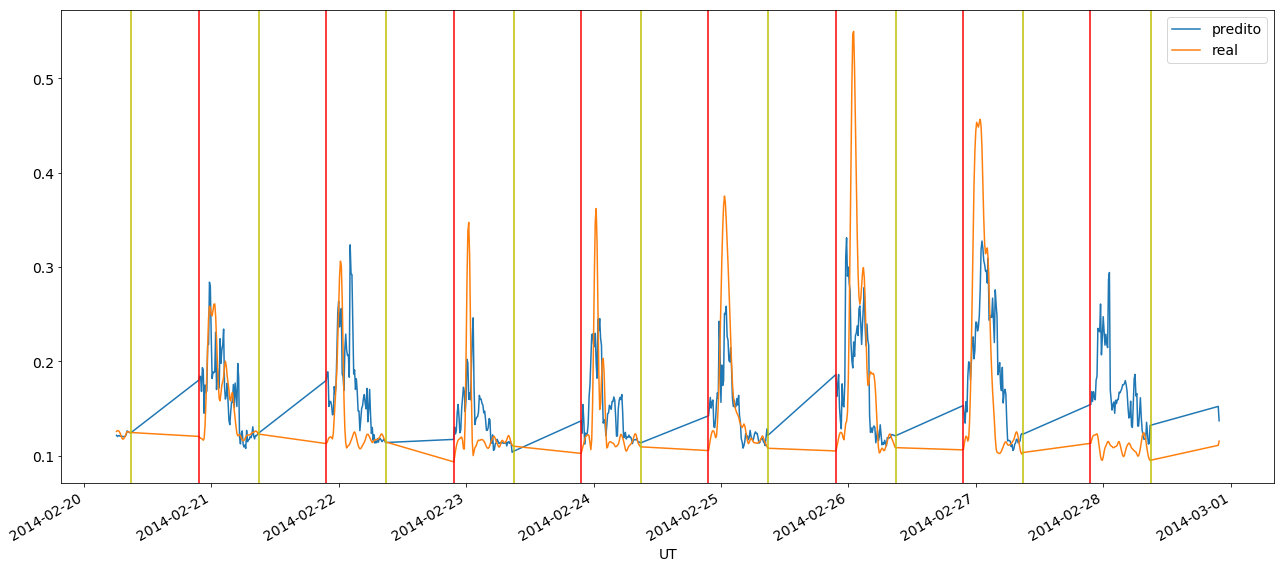


vtec
Error for the time series sample:
acc             0.785080
f1              0.262535
far             0.713456
fn             67.400000
fp             53.600000
kappa           0.093068
me              0.398175
mse             0.007027
pod             0.242697
precission      0.286544
re             29.984570
recall          0.242697
tn            420.400000
tp             21.600000
tse             1.989000
dtype: float64


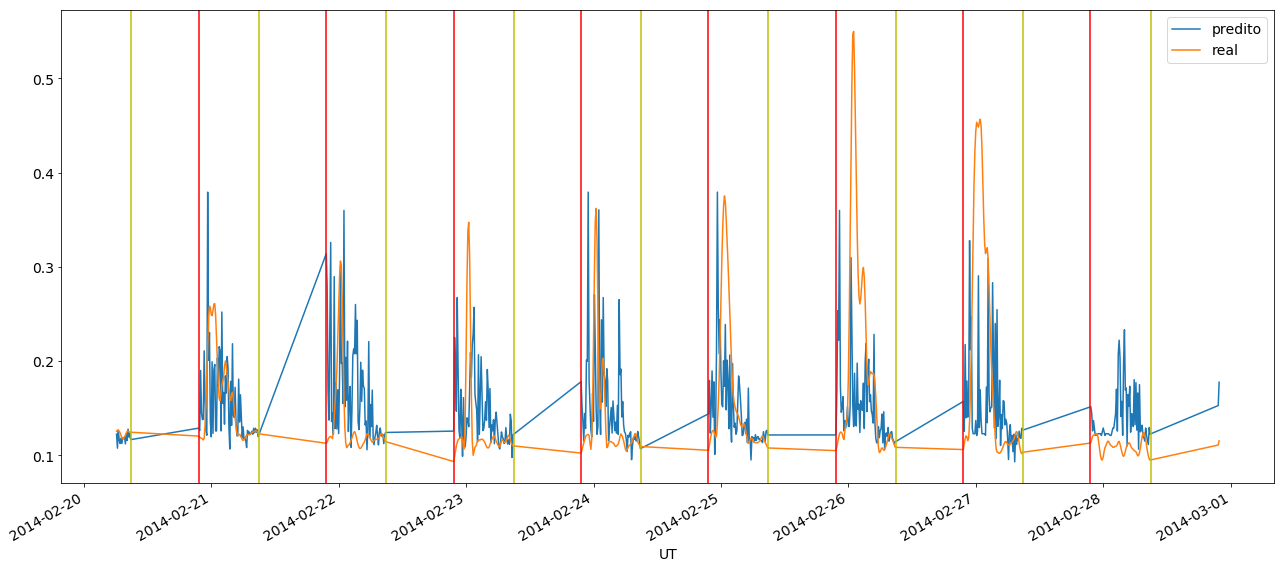


vtec + gvtec1_dt_lag_9
Error for the time series sample:
acc             0.803375
f1              0.498937
far             0.581921
fn             33.900000
fp             76.800000
kappa           0.055827
me              0.348748
mse             0.006142
pod             0.619101
precission      0.418079
re             35.322748
recall          0.619101
tn            397.200000
tp             55.100000
tse             1.859052
dtype: float64


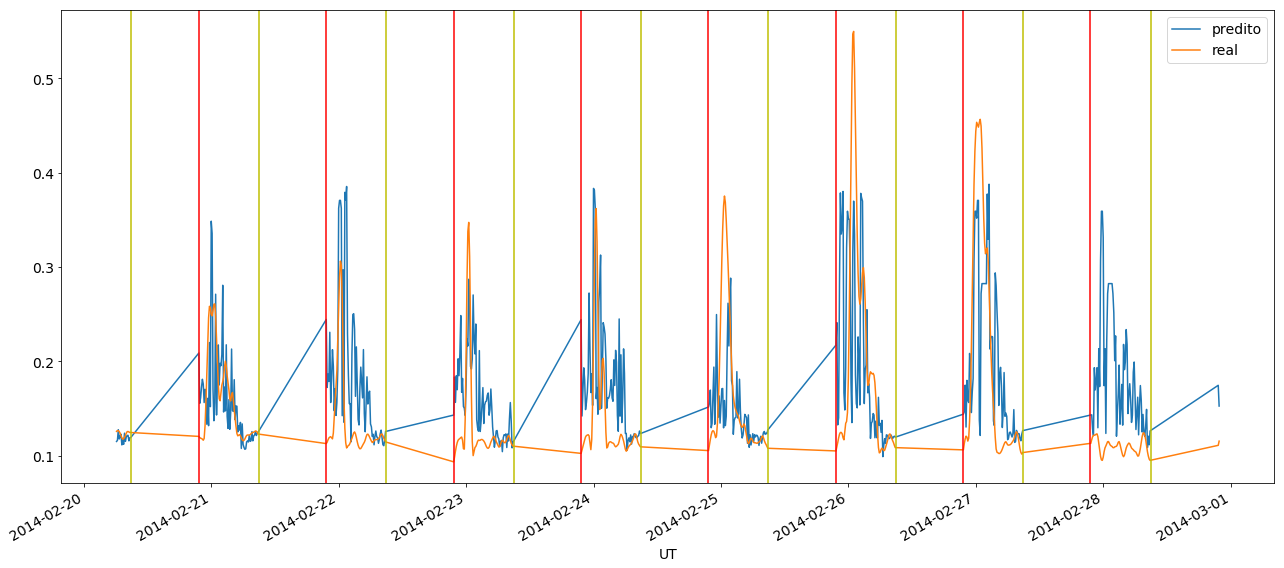


vtec + gvtec2_dt_lag_20
Error for the time series sample:
acc             0.828419
f1              0.475663
far             0.539464
fn             45.200000
fp             51.400000
kappa           0.067302
me              0.316735
mse             0.004529
pod             0.492135
precission      0.460536
re             26.834588
recall          0.492135
tn            422.600000
tp             43.800000
tse             1.596202
dtype: float64


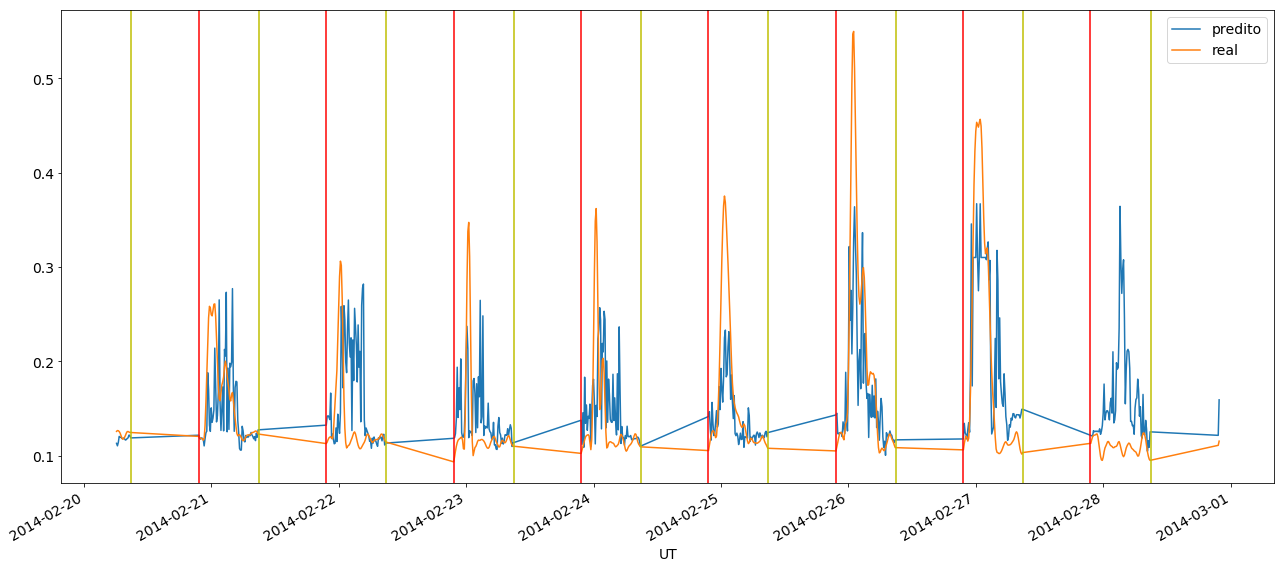


vtec + vtec_dt + vtec_dt2
Error for the time series sample:
acc             0.825044
f1              0.529293
far             0.538549
fn             33.700000
fp             64.800000
kappa           0.054778
me              0.328415
mse             0.005766
pod             0.621348
precission      0.461451
re             32.197559
recall          0.621348
tn            409.200000
tp             55.300000
tse             1.800859
dtype: float64


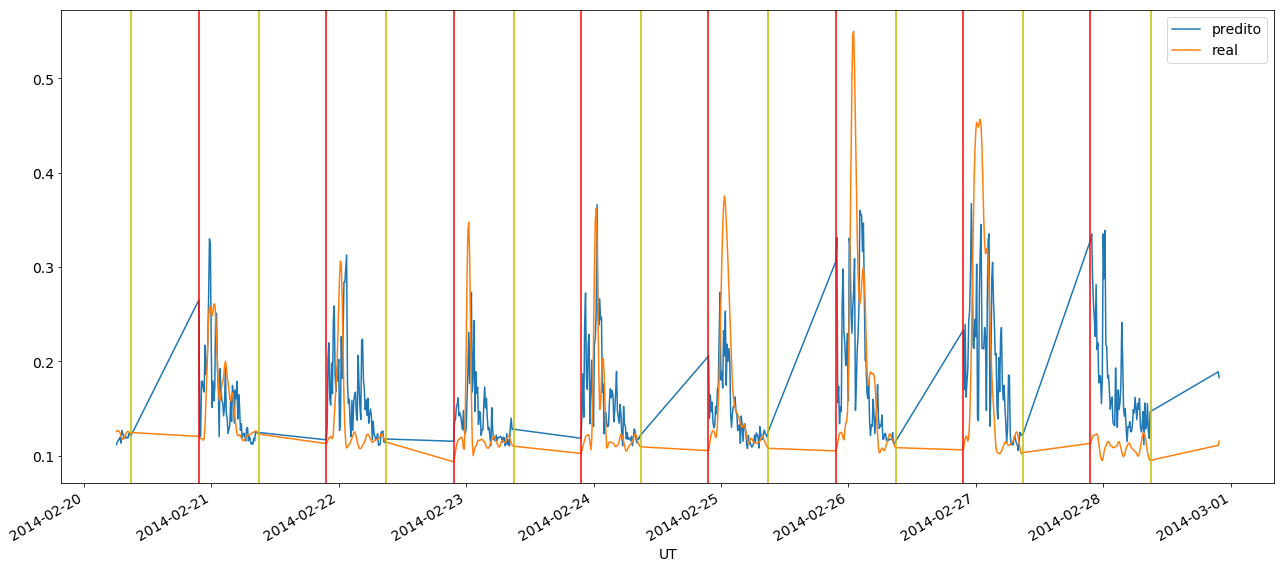


vtec + gvtec1 + gvtec2
Error for the time series sample:
acc             0.833215
f1              0.345192
far             0.545769
fn             64.200000
fp             29.700000
kappa           0.092284
me              0.372879
mse             0.005455
pod             0.278652
precission      0.454231
re             23.744120
recall          0.278652
tn            444.300000
tp             24.800000
tse             1.752292
dtype: float64


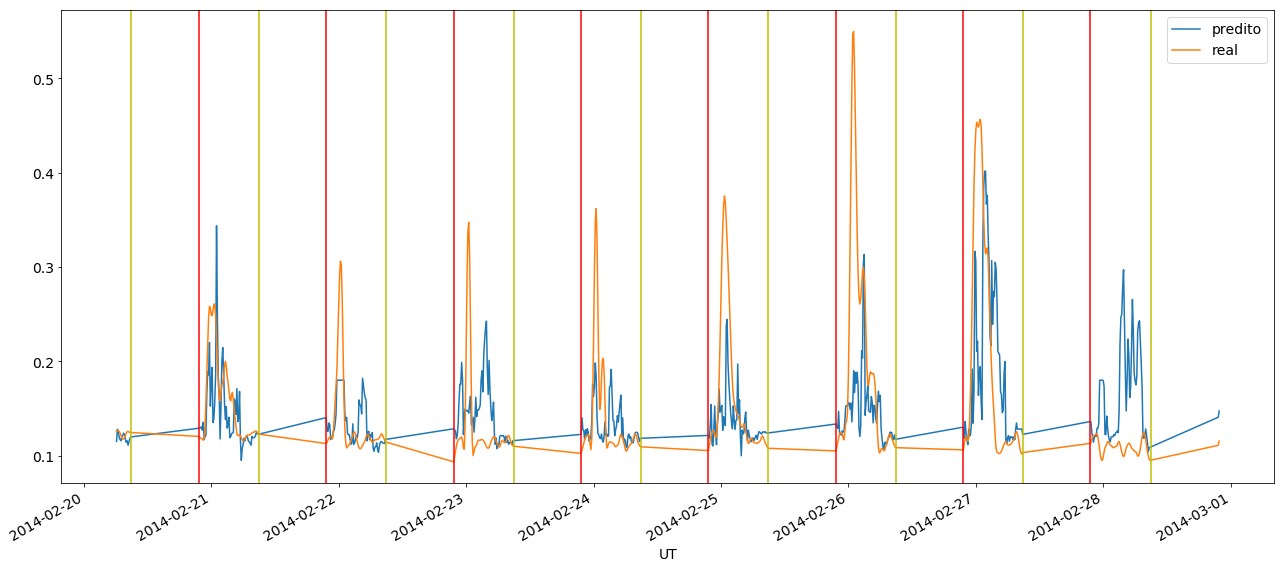


vtec + tempo
Error for the time series sample:
acc             0.782948
f1              0.378642
far             0.654157
fn             51.700000
fp             70.500000
kappa           0.074143
me              0.353147
mse             0.006896
pod             0.419101
precission      0.345843
re             32.385393
recall          0.419101
tn            403.500000
tp             37.300000
tse             1.969833
dtype: float64


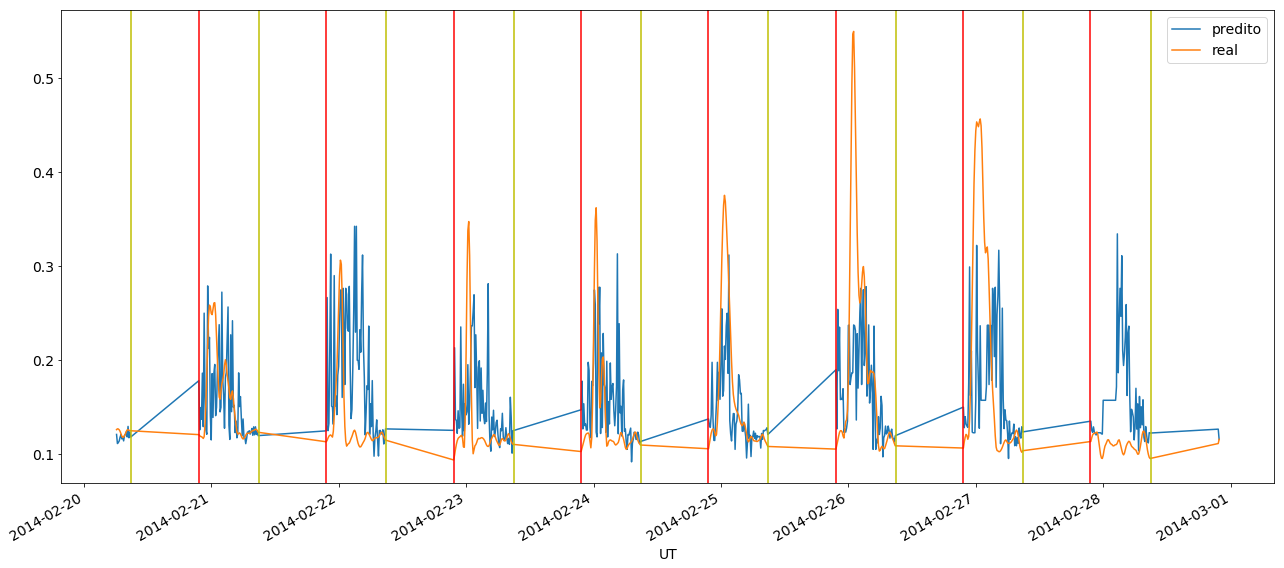


vtec + tempo + mdv1
Error for the time series sample:
acc             0.781883
f1              0.471285
far             0.617259
fn             34.200000
fp             88.600000
kappa           0.057056
me              0.313060
mse             0.008889
pod             0.615730
precission      0.382741
re             40.051849
recall          0.615730
tn            385.400000
tp             54.800000
tse             2.231003
dtype: float64


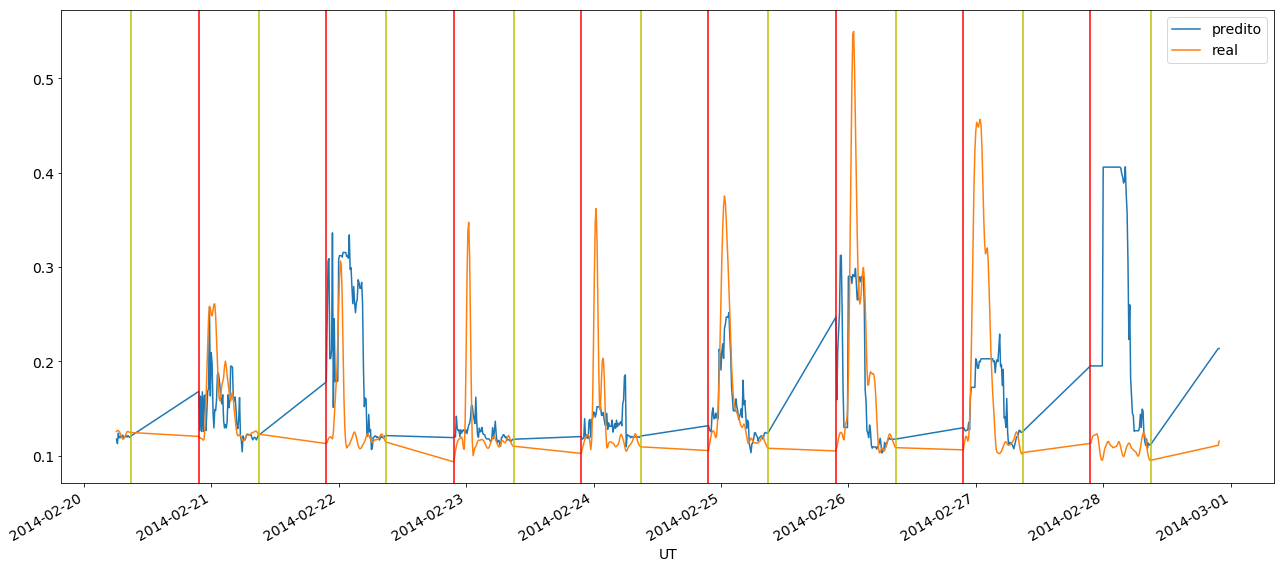


vtec + tempo + lag
Error for the time series sample:
acc             0.818650
f1              0.524904
far             0.551712
fn             32.500000
fp             69.600000
kappa           0.053964
me              0.318939
mse             0.004830
pod             0.634831
precission      0.448288
re             29.205501
recall          0.634831
tn            404.400000
tp             56.500000
tse             1.648343
dtype: float64


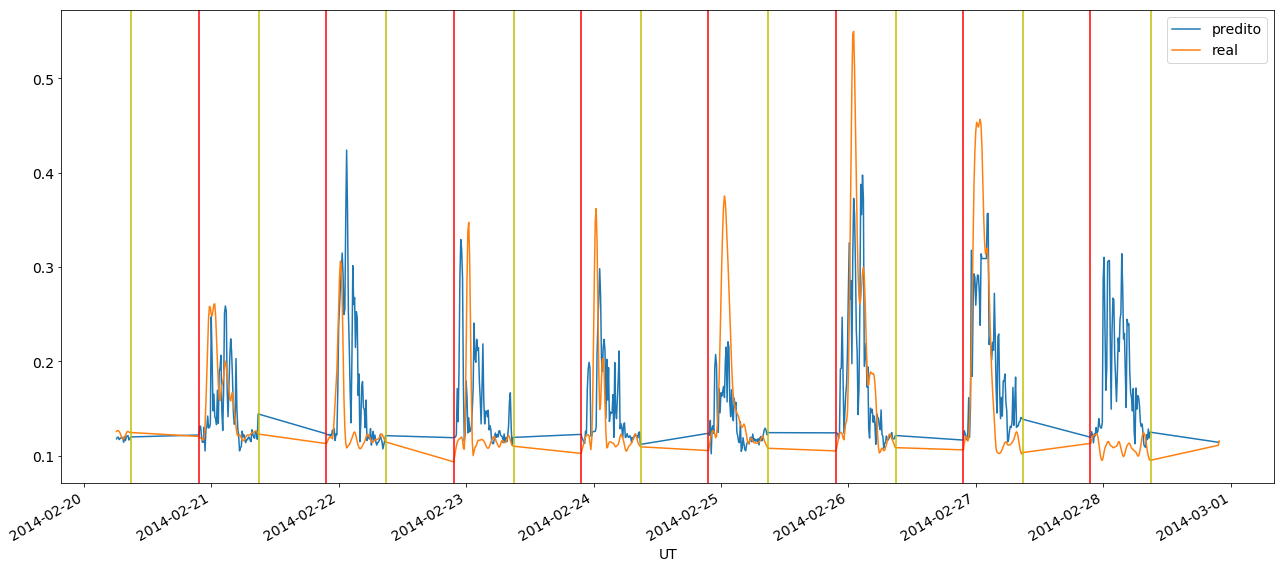


vtec + tempo + lag + mdv1
Error for the time series sample:
acc             0.794316
f1              0.538270
far             0.581986
fn             21.600000
fp             94.200000
kappa           0.045941
me              0.313411
mse             0.007437
pod             0.757303
precission      0.418014
re             36.731066
recall          0.757303
tn            379.800000
tp             67.400000
tse             2.042797
dtype: float64


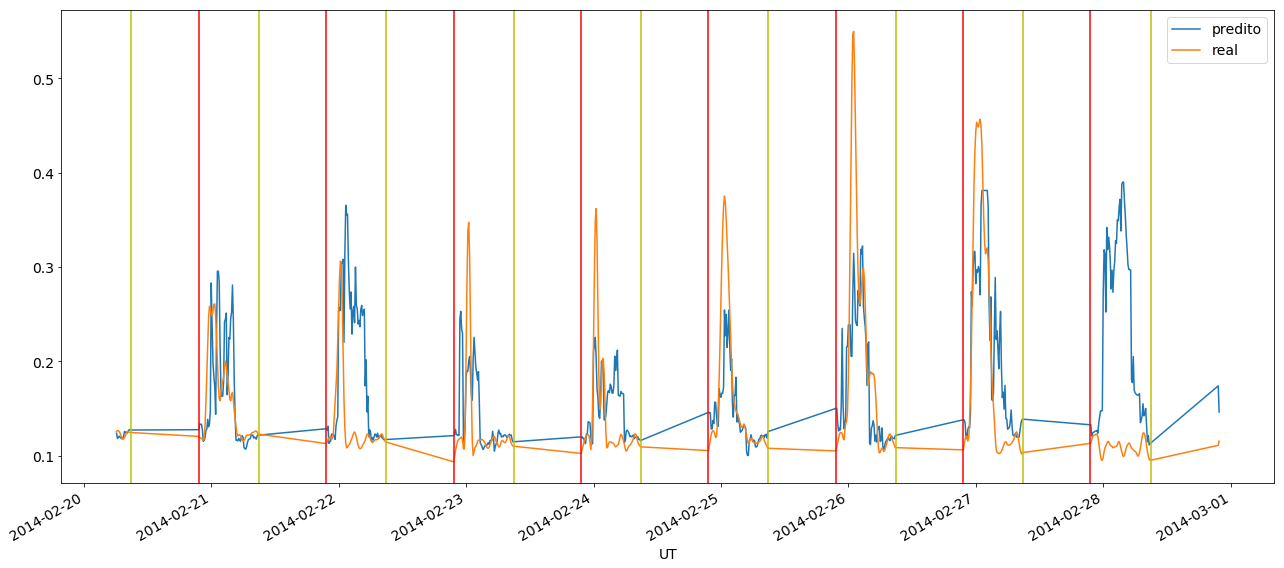


vtec + tempo + lag + mdv2
Error for the time series sample:
acc             0.814742
f1              0.466284
far             0.569242
fn             43.300000
fp             61.000000
kappa           0.065101
me              0.294604
mse             0.005005
pod             0.513483
precission      0.430758
re             28.734107
recall          0.513483
tn            413.000000
tp             45.700000
tse             1.676283
dtype: float64


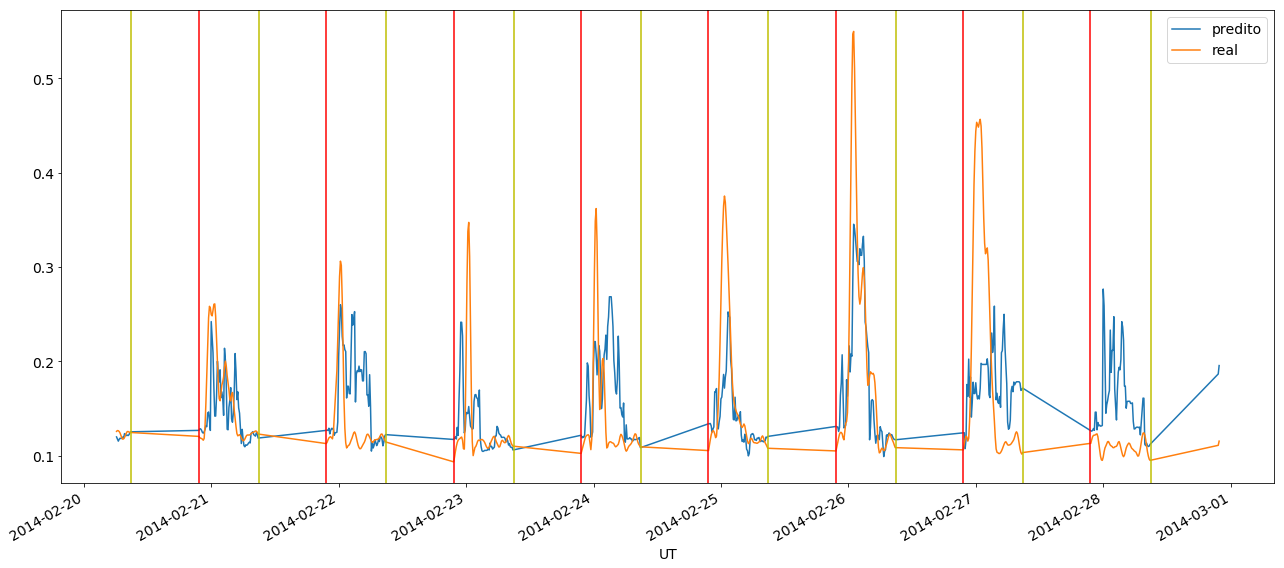


vtec + tempo + lag + mdv1 + mdv2
Error for the time series sample:
acc             0.768028
f1              0.494312
far             0.622327
fn             25.200000
fp            105.400000
kappa           0.050604
me              0.301952
mse             0.006961
pod             0.716854
precission      0.377673
re             37.993036
recall          0.716854
tn            368.600000
tp             63.800000
tse             1.976787
dtype: float64


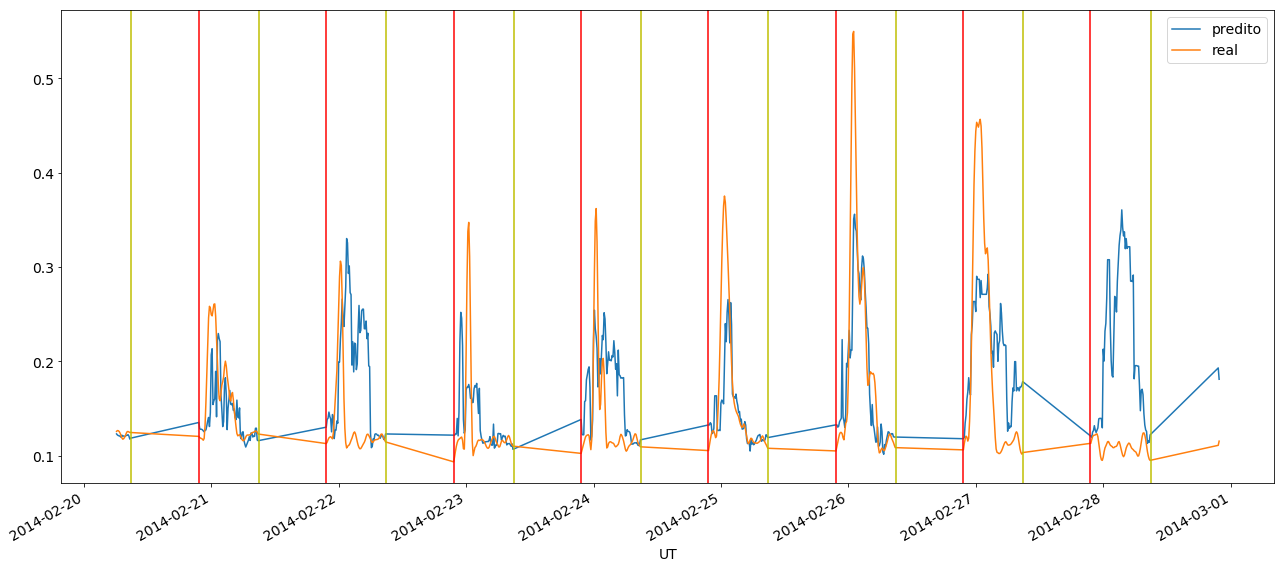

In [6]:
errors = []
for i in set_tests:
    print(i.name)
    dict_error = generate_and_avaliate_model(df=df,
                                            instances_set=list(i.set),
                                            target='s4',
                                            save=True,
                                            file_to_save_model='./images/09_analise_all_cut_0_5/' + i.name + '.eps ',
                                            cut_value=0.5)
    dict_error['name'] = i.name
    errors.append(dict_error)
    print()

In [7]:
df = pd.DataFrame(errors) 
df.index = df['name']
del df['name']
df = df[['tp', 'tn', 'fp', 'fn', 're', 'pod', 'far', 'acc', 'precission', 'recall', 'f1', 'kappa', 'me', 'tse', 'mse']]
pd.set_option('precision', 4)

In [8]:
df

,tp,tn,fp,fn,re,pod,far,acc,precission,recall,f1,kappa,me,tse,mse
name,,,,,,,,,,,,,,,
original,41.1,442.8,31.2,47.9,24.0258,0.4618,0.4282,0.8595,0.5718,0.4618,0.5091,0.0710,0.3491,1.5640,0.0043
original - vtec,54.1,415.9,58.1,34.9,30.8370,0.6079,0.5179,0.8348,0.4821,0.6079,0.5374,0.0556,0.3383,1.6636,0.0049
original - vtec_dt,43.9,443.8,30.2,45.1,23.2037,0.4933,0.4066,0.8663,0.5934,0.4933,0.5374,0.0673,0.3478,1.5536,0.0043
original - gvtec1,41.8,444.6,29.4,47.2,25.0237,0.4697,0.4118,0.8639,0.5882,0.4697,0.5216,0.0701,0.3435,1.5933,0.0045
original - gvtec1_dt,40.2,449.2,24.8,48.8,22.5698,0.4517,0.3819,0.8693,0.6181,0.4517,0.5204,0.0723,0.3654,1.5668,0.0044
original - gvtec2,50.6,408.0,66.0,38.4,31.2776,0.5685,0.5637,0.8146,0.4363,0.5685,0.4923,0.0601,0.3288,1.7187,0.0052
original - gvtec2_dt,43.3,439.0,35.0,45.7,24.5913,0.4865,0.4439,0.8567,0.5561,0.4865,0.5170,0.0682,0.3578,1.5987,0.0045
original + tempo,49.6,440.2,33.8,39.4,24.1656,0.5573,0.4045,0.8700,0.5955,0.5573,0.5745,0.0600,0.3560,1.5303,0.0042
original + gvtec1_dt_lag_9,52.2,435.9,38.1,36.8,24.0937,0.5865,0.4192,0.8670,0.5808,0.5865,0.5821,0.0569,0.3550,1.5254,0.0041
